## Name:- Uzair Chanda
## The Sparks Foundation
## GRIP Task:- Exploratory Data Analysis-Retail

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv("SampleSuperstore.csv")

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
# Check for null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
df['Postal Code'] = df['Postal Code'].astype('object')

In [7]:
df = df.drop(['Postal Code'], axis=1)

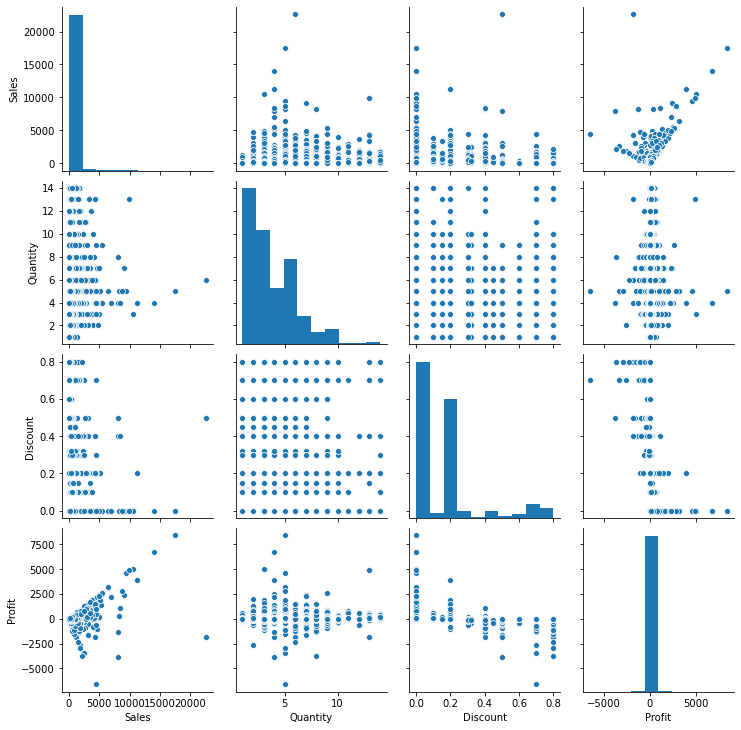

In [8]:
sns.pairplot(df)

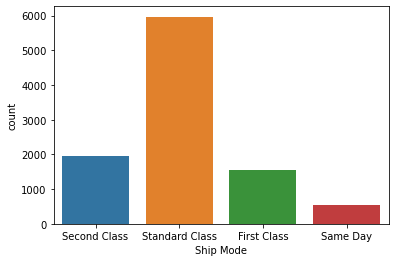

In [13]:
sns.countplot(x = df["Ship Mode"])

In [14]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

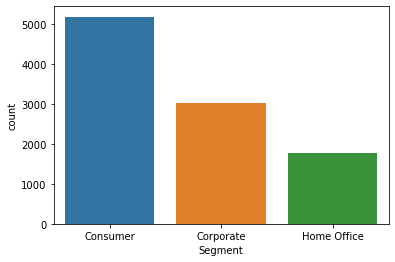

In [16]:
sns.countplot(x = df['Segment'])

In [17]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

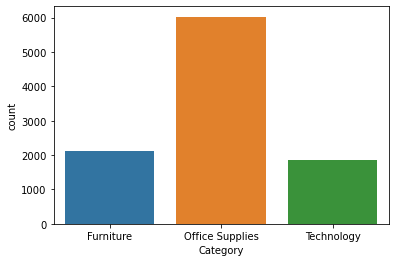

In [18]:
sns.countplot(x = df['Category'])

In [23]:
df['Sub-Category'].value_counts()

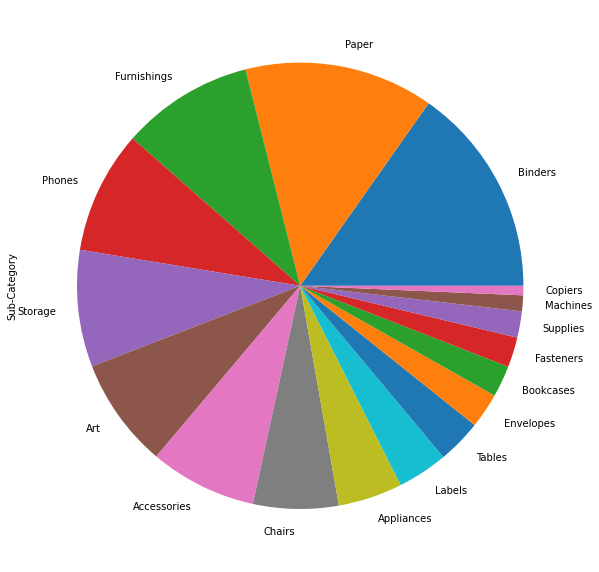

In [27]:
plt.figure(figsize=(10,12))
df['Sub-Category'].value_counts().plot.pie()

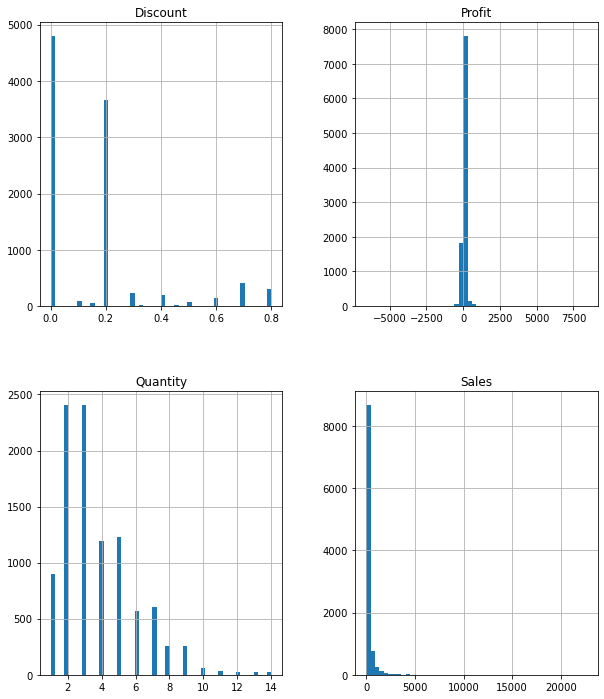

In [29]:
df.hist(figsize = (10,12),bins = 50)
plt.show()

Text(0, 0.5, 'Profit')

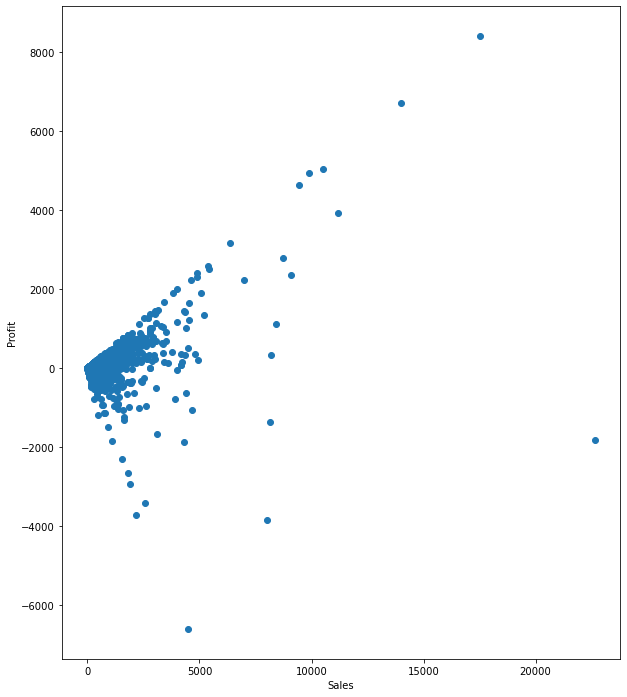

In [34]:
#profit v/s discount

fig,ax  = plt.subplots(figsize = (10,12))
ax.scatter(df['Sales'],df['Profit'])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')


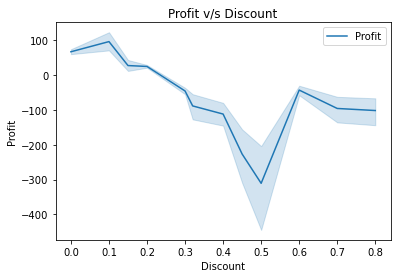

In [37]:
sns.lineplot(x= 'Discount',y= 'Profit', label = 'Profit', data = df)
plt.legend()
plt.title("Profit v/s Discount")
plt.show()

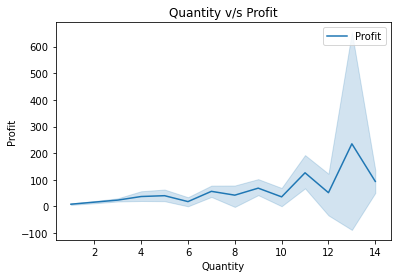

In [38]:
sns.lineplot(x= 'Quantity',y= 'Profit', label = 'Profit', data = df)
plt.legend()
plt.title("Quantity v/s Profit")
plt.show()

In [43]:
segment_group = df.groupby('Segment')[['Profit','Sales']].sum()

In [44]:
segment_group


,Profit,Sales
Segment,,
Consumer,134119.2092,1.161401e+06
Corporate,91979.1340,7.061464e+05
Home Office,60298.6785,4.296531e+05


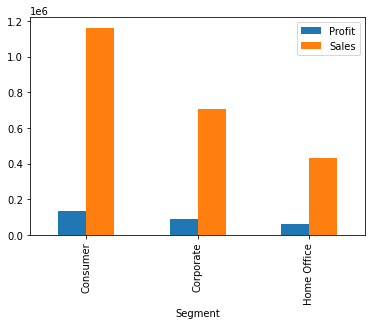

In [48]:
segment_group.plot.bar()

In [49]:
df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [50]:
region_segment = df.groupby('Region')[['Profit', 'Sales']].sum()

In [51]:
region_segment

,Profit,Sales
Region,,
Central,39706.3625,501239.8908
East,91522.7800,678781.2400
South,46749.4303,391721.9050
West,108418.4489,725457.8245


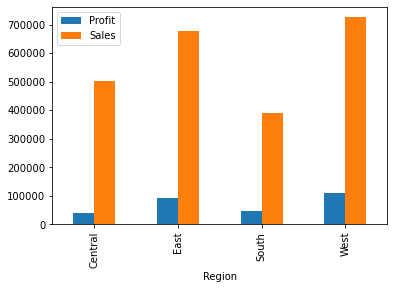

In [52]:
region_segment.plot.bar()

# Observation:

### (i)Technical and office supply have high profit
### (ii)Furnitures have less profit

In [57]:
category_segment = df.groupby('Category')[['Profit', 'Sales']].mean().sort_values(by = 'Sales', ascending = False )

In [58]:
category_segment

,Profit,Sales
Category,,
Technology,78.752002,452.709276
Furniture,8.699327,349.834887
Office Supplies,20.327050,119.324101


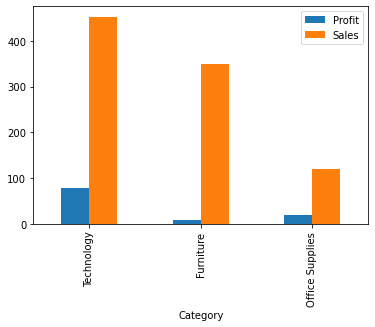

In [59]:
category_segment.plot.bar()

# Thank You